<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Gonzalez_Daniel_A1_Classification_Analysis</h2>
<h4>DAT-5303 | Machine Learning</h4>
Chase Kusterer - Faculty of Analytics<br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />



<h2>Part I: Preparation and Exploration</h2>
<br><h4>a) Imports and Loading the Dataset</h4><br>
Complete the code to import packages and load the 'titanic_feature_rich.xlsx' dataset into Python as <strong>titanic</strong> (from the <em>__storage</em> folder).

In [63]:
# importing libraries
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer
import gender_guesser.detector as gender # guess gender based on (given) name
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm


# loading data for got
file = "./GOT_character_predictions.xlsx"
got = pd.read_excel(file)


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
got.head(n = 10)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
5,6,Tommen Baratheon,NaN,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1
6,7,Valarr Targaryen,Hand of the King,Valyrian,183.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0
7,8,Viserys I Targaryen,NaN,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0
8,9,Wilbert,Ser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0
9,10,Wilbert Osgrey,Ser,NaN,NaN,NaN,NaN,NaN,House Osgrey,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.020067,1


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Reviewing the information of the data</strong><br>   
By running the following code, the information of the data will be presented

In [64]:
#getting information
got.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Reviewing the size of the data </strong><br>
I think that the larger the memory usage, the more it will take to load things 

In [65]:
# seeing the memory usage of the data
got.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Seeing the correlation of the variables </strong><br>
This correlation is running with the raw variables

In [66]:
# correlation of the raw data
df_corr = got.corr(method = "pearson").round(decimals = 2)

df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
isAliveHeir                   0.38
book4_A_Feast_For_Crows       0.27
isAliveFather                 0.20
isAliveSpouse                 0.17
age                           0.09
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
isAliveMother                -0.04
isNoble                      -0.04
isMarried                    -0.05
book2_A_Clash_Of_Kings       -0.07
dateOfBirth                  -0.09
S.No                         -0.13
book1_A_Game_Of_Thrones      -0.15
popularity                   -0.18
numDeadRelations             -0.19
Name: isAlive, dtype: float64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Missing Values</h2><br>
<strong>Verifying our missing values </strong><br>
Here we can see that the amount of missing values are huge

In [67]:
# seeing out missing values
got.isnull().sum(axis = 0)

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Creating a loop for missing values </strong><br>
Creating this loop will help us flag our values that are missing 

In [68]:
# looping to detect features with missing values
for col in got:

    # creating columns with 1s if missing and 0 if not
    if got[col].isnull().astype(int).sum() > 0:
        got['m_'+col] = got[col].isnull().astype(int)


# summing the missing value flags to check the results of the loop above
got.iloc[ :, -14: ].sum(axis = 0)

isAlive            1451
m_title            1008
m_culture          1269
m_dateOfBirth      1513
m_mother           1925
m_father           1920
m_heir             1923
m_house             427
m_spouse           1670
m_isAliveMother    1925
m_isAliveFather    1920
m_isAliveHeir      1923
m_isAliveSpouse    1670
m_age              1513
dtype: int64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>Since there is no missing values in "isMarried", we can assumed that the 1670 of missing values in "spouse" is equal to 0. This is because the book doesn't provide that information </h4>

In [69]:
# dummies variables created for "isMarried"
dummies_isMaybeMarried = pd.get_dummies(got.isMarried, prefix = "isMaybeMarried")

In [70]:
# inserting the new columns in the data set
got = pd.concat([got, dummies_isMaybeMarried ], axis = 1)

In [71]:
# droping colums that are created but I dont need
got.drop("isMaybeMarried_1", axis = 1)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,isMaybeMarried_0
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,1,1,1,0,0,0,1,1,0,0,0,1,1,1
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,0,1,0,1,1,1,0,0,1,1,1,0,0,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1942,Luwin,NaN,Westeros,NaN,NaN,NaN,NaN,House Stark,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171,0,1,0,1,1,1,1,0,1,1,1,1,1,1,1
1942,1943,Reek,NaN,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN,0,1,0,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1
1943,1944,Symeon Star-Eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1944,1945,Coldhands,NaN,NaN,NaN,NaN,NaN,NaN,Three-eyed crow,NaN,0,0,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.130435,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Incomplete attempt</strong><br>
This is something I tried to pull apart the last name of every character but I didn't succeeded.
I was missing a function to help me carry forward the last column, but didn't knew how to implemented.
I think I was heading a good direction.

In [72]:
# # STEP 1: splitting names

# # placeholder list
# placeholder_lst = []

# # looping over each email address
# for index, col in got.iterrows():
    
#     # splitting email domain at ' '
#     split_name = got.loc[index, 'name'].split()
    
#     # appending placeholder_lst with the results
#     placeholder_lst.append(split_name)
    

# # converting placeholder_lst into a DataFrame 
# name_df = pd.DataFrame(placeholder_lst)


# # displaying the resultsname_df
# name_df

In [73]:
# # STEP 2: concatenating with original DataFrame

# # safety measure in case of multiple concatenations
# got = pd.read_excel(file)


# # renaming column to concatenate
# name_df.columns = ["0" , "family_name", "0", "0", "0", "0"]

# # concatenating first_name with friends DataFrame
# got = pd.concat([got, name_df["family_name"]],
#                    axis = 1)


# # printing value counts of first_name
# got.loc[: ,'family_name'].value_counts(sort = False)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Filling missing values</strong><br>
Assuming that the book doesn't mention that every spouse is alive, we will be filling the "isAliveSpouse" with 0 

In [74]:
# creating definitions that includes the variables
fill = 0 
filling_with_0 = ["isAliveSpouse", "isAliveMother", "isAliveFather", "age", 
                    "isAliveHeir", "dateOfBirth" ]

filling_with_unknown = [  "heir", "title", "mother", "father","spouse"]

# filling all the missing values with 0
got[filling_with_0] = got[filling_with_0].fillna(value = fill)

# filling all the missing values with "Unknown"
got[filling_with_unknown] = got[filling_with_unknown].fillna(value = "Unknown")


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Using the "ffill" function </strong><br>
Using the "ffill" method to fill the values for this two variables. This function will fill our missing values with the one forward. Filling that in Game of Thrones, houses are very important, I wanted to distribute the missing values equally and not filling it out with "Unknown". 

In [75]:
# using the method "ffill" on the variable house
got["house"] = got["house"].fillna(method = "ffill")

# using the method "ffill" on the variable culture
got["culture"] = got["culture"].fillna(method = "ffill")

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Filling one last category</strong><br>
After using the method "ffill", one missing value was still missing. I make the decision to fill it with the mean.

In [76]:
# using the method "ffill" on the variable house
got["house"] = got["house"].fillna(value = "0")

# using the method "ffill" on the variable culture
got["culture"] = got["culture"].fillna(value = "0")

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Replacing spaces with "_"</strong><br>
Python doesn't like when we have spaces basically, so I change them.

In [77]:
# replacing the spaces in houses to create dummy variables
got.house = got.house.str.replace(' ','_')

# replacing the spaces in culture to create dummy variables
got.culture = got.culture.str.replace(' ','_')

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Verification "_"</strong><br>
Verifying that the missing values are full

In [78]:
# verifing missing values
got.isnull().any(axis = 0)

S.No                          False
name                          False
title                         False
culture                       False
dateOfBirth                   False
mother                        False
father                        False
heir                          False
house                         False
spouse                        False
book1_A_Game_Of_Thrones       False
book2_A_Clash_Of_Kings        False
book3_A_Storm_Of_Swords       False
book4_A_Feast_For_Crows       False
book5_A_Dance_with_Dragons    False
isAliveMother                 False
isAliveFather                 False
isAliveHeir                   False
isAliveSpouse                 False
isMarried                     False
isNoble                       False
age                           False
numDeadRelations              False
popularity                    False
isAlive                       False
m_title                       False
m_culture                     False
m_dateOfBirth               

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Creating dummy variables for houses</strong><br>
This is something that I wanted to explore, so I created missing variables for them.

In [79]:
# creating missing variables for houses
got = pd.get_dummies(got, columns = ["house"])

# verifing that the dummies are created
got.head()

,S.No,name,title,culture,dateOfBirth,mother,father,heir,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,isMaybeMarried_0,isMaybeMarried_1,house_0,house_Alchemists'_Guild,house_Antler_Men,house_Band_of_Nine,house_Black_Ears,house_Blacks,house_Brave_Companions,house_Brotherhood_Without_Banners,house_Brotherhood_without_Banners,house_Brotherhood_without_banners,house_Burned_Men,house_Chataya's_brothel,house_Citadel,house_City_Watch_of_King's_Landing,house_Company_of_the_Cat,house_Drowned_men,house_Faceless_Men,house_Faith_of_the_Seven,house_Golden_Company,house_Good_Masters,house_Graces,house_Happy_Port,house_House_Allyrion,house_House_Ambrose,house_House_Arryn,house_House_Ashford,house_House_Baelish,house_House_Ball,house_House_Banefort,house_House_Bar_Emmon,house_House_Baratheon,house_House_Baratheon_of_Dragonstone,house_House_Baratheon_of_King's_Landing,house_House_Beesbury,house_House_Belmore,house_House_Bettley,house_House_Blackbar,house_House_Blackberry,house_House_Blackfyre,house_House_Blackmont,house_House_Blacktyde,house_House_Blackwood,house_House_Blanetree,house_House_Blount,house_House_Boggs,house_House_Bolling,house_House_Bolton,house_House_Bolton_of_the_Dreadfort,house_House_Borrell,house_House_Botley,house_House_Bracken,house_House_Brax,house_House_Broom,house_House_Brune_of_Brownhollow,house_House_Brune_of_the_Dyre_Den,house_House_Buckler,house_House_Bulwer,house_House_Bushy,house_House_Butterwell,house_House_Byrch,house_House_Bywater,house_House_Cafferen,house_House_Caron,house_House_Cassel,house_House_Caswell,house_House_Celtigar,house_House_Cerwyn,house_House_Charlton,house_House_Chelsted,house_House_Chester,house_House_Chyttering,house_House_Clegane,house_House_Clifton,house_House_Cockshaw,house_House_Codd,house_House_Coldwater,house_House_Cole,house_House_Condon,house_House_Conklyn,house_House_Connington,house_House_Corbray,house_House_Costayne,house_House_Cox,house_House_Crabb,house_House_Crakehall,house_House_Crane,house_House_Cupps,house_House_Cuy,house_House_Dalt,house_House_Darklyn,house_House_Darry,house_House_Dayne,house_House_Dayne_of_High_Hermitage,house_House_Deddings,house_House_Dondarrion,house_House_Drinkwater,house_House_Drumm,house_House_Dustin,house_House_Egen,house_House_Erenford,house_House_Errol,house_House_Estermont,house_House_Estren,house_House_Farman,house_House_Farring,house_House_Farrow,house_House_Farwynd,house_House_Farwynd_of_the_Lonely_Light,house_House_Fell,house_House_Flint,house_House_Flint_of_Widow's_Watch,house_House_Florent,house_House_Foote,house_House_Fossoway,house_House_Fossoway_of_Cider_Hall,house_House_Fossoway_of_New_Barrel,house_House_Fowler,house_House_Frey,house_House_Frey_of_Riverrun,house_House_Gargalen,house_House_Gaunt,house_House_Glover,house_House_Goodbrook,house_House_Goodbrother,house_House_Goodbrother_of_Shatterstone,house_House_Gower,house_House_Graceford,house_House_Grafton,house_House_Grandison,house_House_Greenfield,house_House_Greenhill,house_House_Grell,house_House_Greyjoy,house_House_Grimm,house_House_Haigh,house_House_Harclay,house_House_Hardy,house_House_Hardyng,house_House_Harlaw,house_House_Harlaw_of_Grey_Garden,house_House_Harlaw_of_Harlaw_Hall,house_House_Harlaw_of_Harridan_Hill,house_House_Harlaw_of_the_Tower_of_Glimmering,house_House_Hasty,house_House_Hawick,house_House_Hayford,house_House_Heddle,house_House_Hetherspoon,house_House_Hewett,house_House_Hightower,house_House_Hoare,house_House_Hogg,house_House_Hollard,house_House_Hornwood,house_House_Horpe,house_House_Humble,house_House_Hunt,house_House_Hunter,house_House_Inchfield,house_House_Ironmaker,house_House_Jast,house_House_Jordayne,house_House_Karstark,house

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Renaming one of the dummy variables</strong><br>
This column was giving me problems since python didn't read it correctly. Maybe is because of the ' in Night's

In [80]:
# renaming one of the columns of since the ' was giving me problems
got = got.rename({"house_Night's_Watch" : "house_Nights_Watch"}, axis = 1)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>Preparing Explanatory and Response Data</strong><br>
Declare the explanatory variables as <strong>got_data</strong> and the response variable (isAlive). 

In [81]:
# declaring explanatory variables
got_data = got.drop("isAlive" ,  axis = 1)


# declaring response variable
got_target = got.loc[:, "isAlive"]# declaring explanatory variables

# verifing that the dummy column was change
got.head()

,S.No,name,title,culture,dateOfBirth,mother,father,heir,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,isMaybeMarried_0,isMaybeMarried_1,house_0,house_Alchemists'_Guild,house_Antler_Men,house_Band_of_Nine,house_Black_Ears,house_Blacks,house_Brave_Companions,house_Brotherhood_Without_Banners,house_Brotherhood_without_Banners,house_Brotherhood_without_banners,house_Burned_Men,house_Chataya's_brothel,house_Citadel,house_City_Watch_of_King's_Landing,house_Company_of_the_Cat,house_Drowned_men,house_Faceless_Men,house_Faith_of_the_Seven,house_Golden_Company,house_Good_Masters,house_Graces,house_Happy_Port,house_House_Allyrion,house_House_Ambrose,house_House_Arryn,house_House_Ashford,house_House_Baelish,house_House_Ball,house_House_Banefort,house_House_Bar_Emmon,house_House_Baratheon,house_House_Baratheon_of_Dragonstone,house_House_Baratheon_of_King's_Landing,house_House_Beesbury,house_House_Belmore,house_House_Bettley,house_House_Blackbar,house_House_Blackberry,house_House_Blackfyre,house_House_Blackmont,house_House_Blacktyde,house_House_Blackwood,house_House_Blanetree,house_House_Blount,house_House_Boggs,house_House_Bolling,house_House_Bolton,house_House_Bolton_of_the_Dreadfort,house_House_Borrell,house_House_Botley,house_House_Bracken,house_House_Brax,house_House_Broom,house_House_Brune_of_Brownhollow,house_House_Brune_of_the_Dyre_Den,house_House_Buckler,house_House_Bulwer,house_House_Bushy,house_House_Butterwell,house_House_Byrch,house_House_Bywater,house_House_Cafferen,house_House_Caron,house_House_Cassel,house_House_Caswell,house_House_Celtigar,house_House_Cerwyn,house_House_Charlton,house_House_Chelsted,house_House_Chester,house_House_Chyttering,house_House_Clegane,house_House_Clifton,house_House_Cockshaw,house_House_Codd,house_House_Coldwater,house_House_Cole,house_House_Condon,house_House_Conklyn,house_House_Connington,house_House_Corbray,house_House_Costayne,house_House_Cox,house_House_Crabb,house_House_Crakehall,house_House_Crane,house_House_Cupps,house_House_Cuy,house_House_Dalt,house_House_Darklyn,house_House_Darry,house_House_Dayne,house_House_Dayne_of_High_Hermitage,house_House_Deddings,house_House_Dondarrion,house_House_Drinkwater,house_House_Drumm,house_House_Dustin,house_House_Egen,house_House_Erenford,house_House_Errol,house_House_Estermont,house_House_Estren,house_House_Farman,house_House_Farring,house_House_Farrow,house_House_Farwynd,house_House_Farwynd_of_the_Lonely_Light,house_House_Fell,house_House_Flint,house_House_Flint_of_Widow's_Watch,house_House_Florent,house_House_Foote,house_House_Fossoway,house_House_Fossoway_of_Cider_Hall,house_House_Fossoway_of_New_Barrel,house_House_Fowler,house_House_Frey,house_House_Frey_of_Riverrun,house_House_Gargalen,house_House_Gaunt,house_House_Glover,house_House_Goodbrook,house_House_Goodbrother,house_House_Goodbrother_of_Shatterstone,house_House_Gower,house_House_Graceford,house_House_Grafton,house_House_Grandison,house_House_Greenfield,house_House_Greenhill,house_House_Grell,house_House_Greyjoy,house_House_Grimm,house_House_Haigh,house_House_Harclay,house_House_Hardy,house_House_Hardyng,house_House_Harlaw,house_House_Harlaw_of_Grey_Garden,house_House_Harlaw_of_Harlaw_Hall,house_House_Harlaw_of_Harridan_Hill,house_House_Harlaw_of_the_Tower_of_Glimmering,house_House_Hasty,house_House_Hawick,house_House_Hayford,house_House_Heddle,house_House_Hetherspoon,house_House_Hewett,house_House_Hightower,house_House_Hoare,house_House_Hogg,house_House_Hollard,house_House_Hornwood,house_House_Horpe,house_House_Humble,house_House_Hunt,house_House_Hunter,house_House_Inchfield,house_House_Ironmaker,house_House_Jast,house_House_Jordayne,house_House_Karstark,house

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>Prepare train-test split for statsmodels</strong><br>
This helps preserve the balance of the response variable on in the training and testing sets.

In [82]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target) # preserving balance


# merging training data for statsmodels
got_train = pd.concat([x_train, y_train], axis = 1)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>Creating loop for variable</strong><br>
This loop is created to save time and prepared the variables for regression.

In [83]:
for val in got_data:
    print(f" {val} + ")

 S.No + 
 name + 
 title + 
 culture + 
 dateOfBirth + 
 mother + 
 father + 
 heir + 
 spouse + 
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 isAliveMother + 
 isAliveFather + 
 isAliveHeir + 
 isAliveSpouse + 
 isMarried + 
 isNoble + 
 age + 
 numDeadRelations + 
 popularity + 
 m_title + 
 m_culture + 
 m_dateOfBirth + 
 m_mother + 
 m_father + 
 m_heir + 
 m_house + 
 m_spouse + 
 m_isAliveMother + 
 m_isAliveFather + 
 m_isAliveHeir + 
 m_isAliveSpouse + 
 m_age + 
 isMaybeMarried_0 + 
 isMaybeMarried_1 + 
 house_0 + 
 house_Alchemists'_Guild + 
 house_Antler_Men + 
 house_Band_of_Nine + 
 house_Black_Ears + 
 house_Blacks + 
 house_Brave_Companions + 
 house_Brotherhood_Without_Banners + 
 house_Brotherhood_without_Banners + 
 house_Brotherhood_without_banners + 
 house_Burned_Men + 
 house_Chataya's_brothel + 
 house_Citadel + 
 house_City_Watch_of_King's_Landing + 
 house_Company_

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Incomplete attempt</strong><br>
In this attempt, I tried to group some variables but I wasn't successful.

In [84]:
# # explanatory sets from last session

# # creating a dictionary to store candidate models

# dummy_houses = {

#  # full model
#  'house_lanister'   : ['house_House Lannister', 'house_House Lannister of Casterly Rock',
#                        'house_House Lannister of Lannisport'],
 

#  # significant variables only (set 1)
#  'house_tully'      : ['house_House Tully'],
    
    
#  # significant variables only (set 2)
#  'house_arryn'      : ['house_House Arryn'],
    
#    # full model
#  'house_martell'    : ['house_House Martell'],
     
#      # full model
#  'house_baratheon'  : ['house_House Baratheon', 'house_House Baratheon of Dragonstone', 
#                          "house_House Baratheon of King's Landing"],
    
#      # full model
#  'house_tyrell'     : [' house_House Tyrell',  'house_House Tyrell of Brightwater Keep'],
    
#      # significant variables only (set 1)
#  'house_greyjoy'    : ['house_House Greyjoy'],
    
#    # significant variables only (set 1)
#  'house_targaryen'  : ['house_House Targaryen'], 
    
#      # significant variables only (set 1)
#  'house_stark'      : ['house_House Stark'],
    
#         # significant variables only (set 1)
#  'house_nights_watch' : ["house_Night's Watch"]
    
    
# }

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Seeing the correlation of the variables </strong><br>
This correlation is running with the new variables

In [85]:
# correlation of the new variables
df_corr = got.corr(method = "pearson").round(decimals = 2)


# sorting it False
df_corr['isAlive'].sort_values(ascending = False)

isAlive                                          1.00
book4_A_Feast_For_Crows                          0.27
m_age                                            0.15
m_dateOfBirth                                    0.15
m_mother                                         0.14
m_isAliveMother                                  0.14
m_isAliveFather                                  0.14
m_father                                         0.14
m_isAliveHeir                                    0.13
m_heir                                           0.13
house_House_Tyrell                               0.07
isMaybeMarried_0                                 0.05
age                                              0.05
house_House_Baratheon_of_Dragonstone             0.05
m_spouse                                         0.05
m_isAliveSpouse                                  0.05
house_House_Ironmaker                            0.04
house_Happy_Port                                 0.04
house_Brotherhood_Without_Ba

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Building my first logistic regression model </strong><br>
 Fitting the model for the regression.

In [86]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ isAlive ~  book1_A_Game_Of_Thrones + 
                                                     book2_A_Clash_Of_Kings + 
                                                     book3_A_Storm_Of_Swords + 
                                                     book4_A_Feast_For_Crows + 
                                                     book5_A_Dance_with_Dragons + 
                                                     isAliveMother + 
                                                     isAliveFather + 
                                                     isAliveHeir + 
                                                     isAliveSpouse + 
                                                     isMarried + 
                                                     isNoble + 
                                                     age + 
                                                     numDeadRelations + 
                                                     popularity + 
                                                     m_title + 
                                                     m_culture + 
                                                     m_dateOfBirth + 
                                                     m_mother + 
                                                     m_father + 
                                                     m_heir + 
                                                     m_house + 
                                                     m_spouse + 
                                                     m_isAliveMother + 
                                                     m_isAliveFather + 
                                                     m_isAliveHeir + 
                                                     m_isAliveSpouse + 
                                                     m_age + 
                                                     isMaybeMarried_0 + 
                                                     isMaybeMarried_1 + 
                                                     house_House_Targaryen +
                                                     house_Nights_Watch 
 
         
                                                           """,
                                        data    = got_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

         Current function value: 0.483749
         Iterations: 35


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                           Results: Logit
=====================================================================================================
Model:                          Logit                        Pseudo R-squared:             0.147     
Dependent Variable:             isAlive                      AIC:                          1742.0883 
Date:                           2021-12-07 14:03             BIC:                          1873.3190 
No. Observations:               1751                         Log-Likelihood:               -847.04   
Df Model:                       23                           LL-Null:                      -992.53   
Df Residuals:                   1727                         LLR p-value:                  3.0274e-48
Converged:                      0.0000                       Scale:                        1.0000    
No. Iterations:                 35.0000                                                              
-----------------------------------------------------------------------------------------------------
                            Coef.      Std.Err.        z    P>|z|        [0.025           0.975]     
-----------------------------------------------------------------------------------------------------
Intercept                  -8.0202     5403344.5952 -0.0000 1.0000    -10590368.8230    10590352.7825
book1_A_Game_Of_Thrones    -0.5135           0.1616 -3.1766 0.0015           -0.8303          -0.1967
book2_A_Clash_Of_Kings     -0.3208           0.1451 -2.2106 0.0271           -0.6052          -0.0364
book3_A_Storm_Of_Swords    -0.2309           0.1513 -1.5263 0.1269           -0.5275           0.0656
book4_A_Feast_For_Crows     1.5985           0.1537 10.3990 0.0000            1.2972           1.8998
book5_A_Dance_with_Dragons  0.0057           0.1501  0.0377 0.9699           -0.2885           0.2998
isAliveMother               0.4964           1.5451  0.3212 0.7480           -2.5320           3.5247
isAliveFather               0.0628           1.1709  0.0536 0.9572           -2.2321           2.3577
isAliveHeir                15.0448           1.8512  8.1273 0.0000           11.4166          18.6730
isAliveSpouse               0.6305           0.3720  1.6947 0.0901           -0.0987           1.3596
isMarried                  -4.9303    12776118.7175 -0.0000 1.0000    -25040737.4789    25040727.6183
isNoble                    -0.2254           0.4626 -0.4873 0.6260           -1.1322           0.6813
age                         0.0000           0.0001  0.3163 0.7518           -0.0001           0.0001
numDeadRelations           -0.0222           0.0534 -0.4152 0.6780           -0.1267           0.0824
popularity                 -0.5012           0.5276 -0.9499 0.3422           -1.5352           0.5329
m_title                     0.0044           0.4654  0.0095 0.9924           -0.9078           0.9166
m_culture                   0.1082           0.1364  0.7931 0.4277           -0.1591           0.3755
m_dateOfBirth               0.3834              nan     nan    nan               nan              nan
m_mother                    0.9026              nan     nan    nan               nan              nan
m_father                    0.3888              nan     nan    nan               nan              nan
m_heir                      7.4505     1037805.4923  0.0000 1.0000     -2034053.9373     2034068.8383
m_house                     0.3755           0.1682  2.2326 0.0256            0.0459           0.7051
m_spouse                   -3.0900              nan     nan    nan               nan              nan
m_isAliveMother             0.9026              nan     nan    nan               nan              nan
m_isAliveFather             0.3888     1741526.3485  0.0000 1.0000     -3413328.5324     3413329.3099
m_isAliveHeir               7.4505      997072.4365  0.0000 1.0000     -1954218.6150     1954233.5161
m_isAliveSpouse  

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Building a logistic regression model </strong><br>
 Fitting the model for the regression. Much cleaner and with better P-Values

In [87]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ isAlive ~ book1_A_Game_Of_Thrones + 
                                                  book4_A_Feast_For_Crows + 
                                                  popularity + 
                                                  house_House_Targaryen +
                                                  house_Nights_Watch +
                                                  m_dateOfBirth 
                                                           """,
                                        data    = got_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.494472
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.128     
Dependent Variable:   isAlive            AIC:                1745.6420 
Date:                 2021-12-07 14:03   BIC:                1783.9176 
No. Observations:     1751               Log-Likelihood:     -865.82   
Df Model:             6                  LL-Null:            -992.53   
Df Residuals:         1744               LLR p-value:        7.5982e-52
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                0.1331   0.1629  0.8173 0.4137 -0.1861  0.4523
book1_A_Game_Of_Thrones -0.5739   0.1488 -3.8563 0.0001 -0.8655 -0.2822
book4_A_Feast_For_Crows  1.4845   0.1288 11.5250 0.0000  1.2321  1.7370
popularity              -1.7487   0.3615 -4.8367 0.0000 -2.4573 -1.0401
house_House_Targaryen   -0.8890   0.2822 -3.1504 0.0016 -1.4420 -0.3359
house_Nights_Watch      -0.6771   0.2089 -3.2407 0.0012 -1.0865 -0.2676
m_dateOfBirth            0.7643   0.1511  5.0587 0.0000  0.4682  1.0605
=======================================================================

"""

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Creating a dictionary </strong><br>
This will help us in the future when calling the columns more easily. 

In [88]:
# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ["name", "title", "culture", "dateOfBirth", "mother", "father",
                   "heir", "spouse", "book1_A_Game_Of_Thrones", "book2_A_Clash_Of_Kings",
                   "book3_A_Storm_Of_Swords", "book4_A_Feast_For_Crows", "book5_A_Dance_with_Dragons",
                   "isAliveMother", "isAliveFather", "isAliveHeir", "isAliveSpouse", "isMarried",
                   "isNoble", "age", "numDeadRelations", "popularity", "m_title", "m_culture",
                   "m_dateOfBirth", "m_mother", "m_father", "m_heir", "m_house", "m_spouse",
                   "m_isAliveMother", "m_isAliveFather", "m_isAliveHeir", "m_isAliveSpouse",
                   "m_age", "isMaybeMarried_0","house_House_Lannister", "house_House_Tully", "house_House_Arryn",
                   "house_House_Martell", "house_House_Baratheon", "house_House_Tyrell",
                   "house_House_Greyjoy", "house_House_Targaryen", "house_House_Stark",
                   "house_Nights_Watch"],
 

 # significant variables only (set 1)
 'logit_sig'    : ["book1_A_Game_Of_Thrones", "book4_A_Feast_For_Crows",
                   "popularity", "house_House_Targaryen", "house_Nights_Watch",
                   "m_dateOfBirth"],
    

}

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Building a logistic regression model in scikit-learn</strong><br>
Building a logistic regression model in scikit-learn.

In [89]:
# train/test split with the full model
got_data   =  got.loc[ : , candidate_dict["logit_sig"]]
got_target   =  got.loc[ : , "isAlive"]


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy

Training ACCURACY: 0.7727
Testing  ACCURACY: 0.8154


In [90]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel() #pulling data 1 by 1


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 17
False Positives: 33
False Negatives: 3
True Positives : 142



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Run the following code to load a user-defined function for CART model output.</strong><br>


In [91]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Creating a model with DecisionTreeClassifier </strong><br>
This model will be called <strong>full_tree<strong>.

In [92]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.8709
Full Tree Testing ACCURACY : 0.7846
Full Tree AUC Score: 0.7176


In [93]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 29
False Positives: 21
False Negatives: 21
True Positives : 124



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Feature Importance</strong><br>
Feature Importance will help us see the importance of the variable

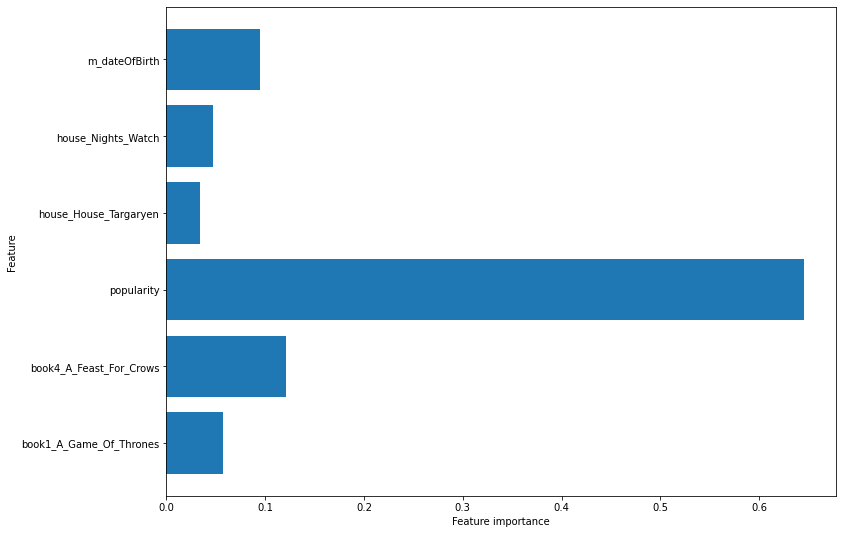

In [94]:
# plotting feature importances
plot_feature_importances(model = full_tree_fit,
                         train = x_train,
                        export = False)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Using the DecisionTreeClassifier</strong><br>
This model will be called <strong>tree_pruned<strong>.

In [95]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth       = 8  ,
                                    min_samples_leaf = 25 ,
                                    random_state     = 219)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
tree_pruned_pred = tree_pruned_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pruned_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = tree_pruned_fit.score(x_test, y_test).round(4) # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = tree_pruned_pred).round(4) # auc

Training ACCURACY: 0.8053
Testing  ACCURACY: 0.8564
AUC Score        : 0.7462


In [96]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_pruned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 26
False Positives: 24
False Negatives: 4
True Positives : 141



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Feature Importance</strong><br>
Feature Importance will help us see the importance of the variable

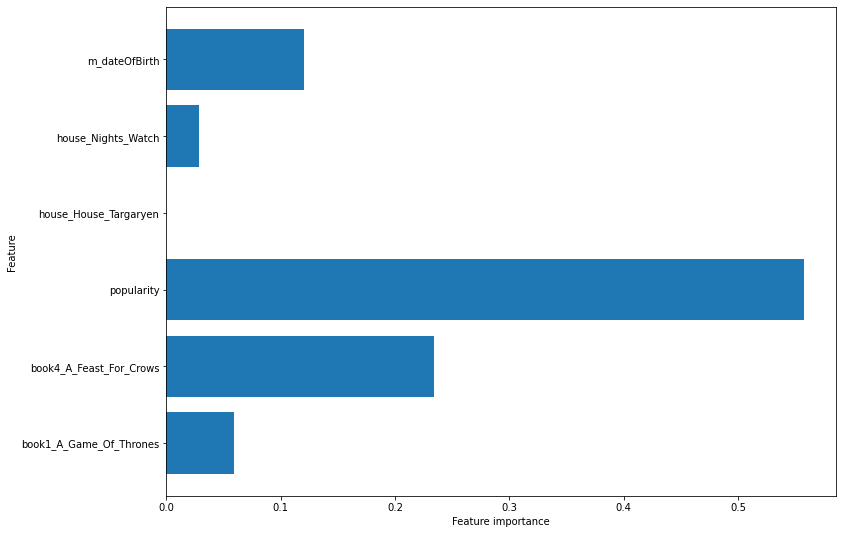

In [97]:
# plotting feature importance
plot_feature_importances(tree_pruned_fit,
                         train = x_train,
                         export = False)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Creating a model with LogisticRegression </strong><br>
This model will be called <strong>lr_default<strong>.
    
<strong>Logistic Regression with Default Hyperparameters for comparison.<strong>

In [98]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False, #run the tree again
                                random_state = 219)

In [99]:
# FITTING the training data
lr_default_fit = lr_default.fit(x_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(x_test, y_test).round(4))


# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))


# saving scoring data for future use
logreg_train_score = lr_default_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)

Training ACCURACY: 0.7727
Testing  ACCURACY: 0.8154
AUC Score        : 0.6597


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Hyperparameter Tuning with Logistic Regression </strong><br>
This model will be called <strong>lr_tuned<strong>.

In [100]:
# ########################################
# # RandomizedSearchCV
# ########################################

# # declaring a hyperparameter space
# C_range          = np.arange(0.1, 5.0, 0.1) #strenght of penalty
# warm_start_range = [True, False]
# solver_range     = ['newton-cg', 'sag', 'lbfgs']


# # creating a hyperparameter grid
# param_grid = {'C'          : C_range,
#               'warm_start' : warm_start_range,
#               'solver'     : solver_range}


# # INSTANTIATING the model object without hyperparameters
# lr_tuned = LogisticRegression(random_state = 219,
#                               max_iter     = 1000) # increased for convergence


# # GridSearchCV object
# lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
#                                  param_distributions = param_grid, # parameters to tune
#                                  cv                  = 3,          # how many folds in cross-validation
#                                  n_iter              = 250,        # number of combinations of hyperparameters to try
#                                  random_state        = 219,        # starting point for random sequence
#                                  scoring = make_scorer(
#                                            roc_auc_score,
#                                            needs_threshold = False)) # scoring criteria (AUC)


# # FITTING to the FULL DATASET (due to cross-validation)
# lr_tuned_cv.fit(got_data, got_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", lr_tuned_cv.best_params_)
# print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Creating the model by hard coding </strong><br>


In [101]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(C            = 3.9000000000000004,
                              warm_start   = True,
                              solver       = 'newton-cg',
                              max_iter     = 1000,
                              random_state = 219)


# FITTING the model
lr_tuned_fit = lr_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

Training ACCURACY: 0.7744
Testing  ACCURACY: 0.8256
AUC Score        : 0.6862


In [102]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 20
False Positives: 30
False Negatives: 4
True Positives : 141



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Hyperparameter Tuning with Classification Trees </strong><br>


In [103]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

In [104]:
# max_depth        = np.arange(4, 8, 1) #strenght of penalty
# criterion        = ["gini", "entropy"]
# min_samples_leaf = np.arange(30, 200, 10)
# max_features     = ["auto", "sqrt", "log2"]

# # creating a hyperparameter grid
# param_grid = {'max_depth'          : max_depth,
#               'criterion'          : criterion,
#               'min_samples_leaf'   : min_samples_leaf,
#               'max_features'        : max_features }


# # INSTANTIATING the model object without hyperparameters
# lr_tuned = DecisionTreeClassifier(random_state = 219)


# # GridSearchCV object
# lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
#                                  param_distributions = param_grid, # parameters to tune
#                                  cv                  = 3,          # how many folds in cross-validation
#                                  n_iter              = 250,        # number of combinations of hyperparameters to try
#                                  random_state        = 219,        # starting point for random sequence
#                                  scoring = make_scorer(
#                                            roc_auc_score,
#                                            needs_threshold = False)) # scoring criteria (AUC)


# # FITTING to the FULL DATASET (due to cross-validation)
# lr_tuned_cv.fit(got_data, got_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", lr_tuned_cv.best_params_)
# print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Creating the model by hard coding </strong><br>

Hard coding for model <strong>tree_tuned</strong>.


In [105]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(splitter         = 'random',
                                    min_samples_leaf = 30,
                                    max_depth        = 7,
                                    criterion        = 'gini',
                                    random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
tree_tuned_fit = tree_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                       y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.7984
Testing  ACCURACY: 0.8718
AUC Score        : 0.7566


In [106]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 26
False Positives: 24
False Negatives: 1
True Positives : 144



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Feature Importance</strong><br>
Feature Importance will help us see the importance of the variable

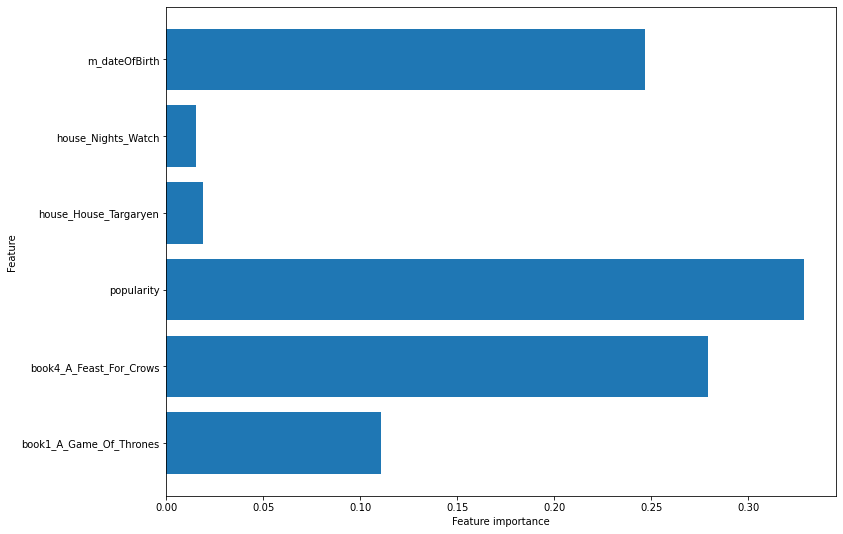

In [107]:
# plotting feature importances
plot_feature_importances(model = tree_tuned_fit,
                         train = x_train,
                        export = False)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Building a model for Random Forest</strong><br>
Model is called defined as <strong>rf_default</strong>.

In [108]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


In [109]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = "gini",
                                    max_depth        = 4,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [110]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

# saving scoring data for future use
rf_default_train_score =  rf_default_fit.score(x_train, y_train).round(4) # accuracy
rf_default_test_score  =  rf_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
rf_default_auc_score         = roc_auc_score(y_true  = y_test,
                                       y_score = rf_default_fit_pred).round(4) # auc


Training ACCURACY: 0.8024
Testing  ACCURACY: 0.8667
AUC Score        : 0.74


In [111]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 24
False Positives: 26
False Negatives: 0
True Positives : 145



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Feature Importance</strong><br>
Feature Importance will help us see the importance of the variable

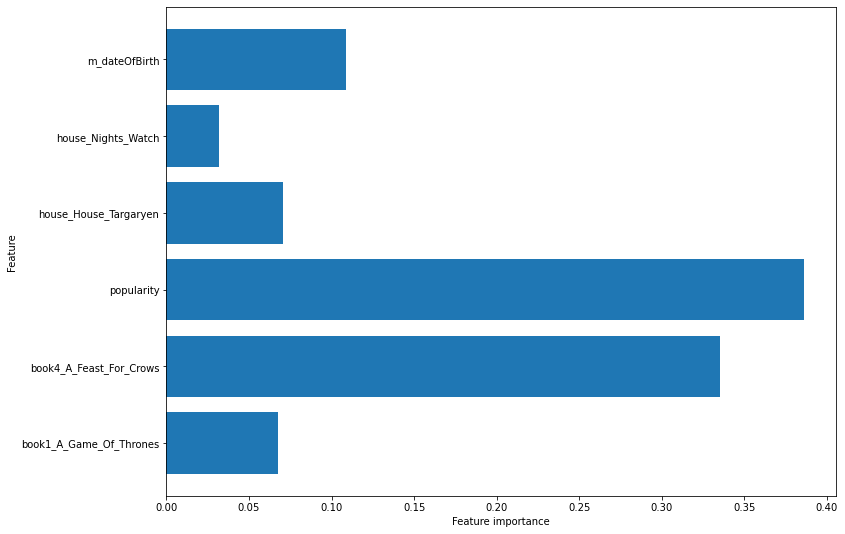

In [112]:
# plotting feature importances
plot_feature_importances(model = rf_default_fit,
                         train = x_train,
                        export = False)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Making a comparison to select my best model</strong><br>


In [113]:
# comparing results
print(f"""
Model                    AUC Score        Training Accurracy        Testing Accuracy        TN, FP, FN, TP
-----                    ---------        ------------------        ----------------        --------------
Logistic                 {logreg_auc_score}                 {logreg_train_score}                 {logreg_test_score}               {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree                {full_tree_auc_score}                 {full_tree_auc_score}                 {full_tree_test_score}               {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree              {pruned_tree_auc_score}                 {pruned_tree_train_score}                 {pruned_tree_test_score}               {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
lr_tuned                 {lr_tuned_auc}                 {lr_tuned_train_score}                 {lr_tuned_test_score}               {lr_tuned_tn, lr_tuned_fp, lr_tuned_fn, lr_tuned_tp}
Tree Tuned               {tree_tuned_auc}                 {tree_tuned_train_score}                 {tree_tuned_test_score}               {tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp}
Ranfom Forrest Default   {rf_default_auc_score}                   {rf_default_train_score}                 {rf_default_test_score}               {rf_tn, rf_fp, rf_fn, rf_tp }
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree', 'lr tuned',
                       'Tree Tuned', 'Ranfom Forrest Default'  ],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score,
                   pruned_tree_auc_score, lr_tuned_auc,
                   tree_tuned_auc, rf_default_auc_score ],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score, lr_tuned_train_score,
                          tree_tuned_train_score, rf_default_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score, lr_tuned_test_score,
                          tree_tuned_test_score, rf_default_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp),
                          (lr_tuned_tn, lr_tuned_fp, lr_tuned_fn, lr_tuned_tp),
                          (tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp),
                          (rf_tn, rf_fp, rf_fn, rf_tp  )]}





Model                    AUC Score        Training Accurracy        Testing Accuracy        TN, FP, FN, TP
-----                    ---------        ------------------        ----------------        --------------
Logistic                 0.6597                 0.7727                 0.8154               (17, 33, 3, 142)
Full Tree                0.7176                 0.7176                 0.7846               (29, 21, 21, 124)
Pruned Tree              0.7462                 0.8053                 0.8564               (26, 24, 4, 141)
lr_tuned                 0.6862                 0.7744                 0.8256               (20, 30, 4, 141)
Tree Tuned               0.7566                 0.7984                 0.8718               (26, 24, 1, 144)
Ranfom Forrest Default   0.74                   0.8024                 0.8667               (24, 26, 0, 145)



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Preparing the "best" model for another tuning</strong><br>
I identify the <strong>Full Tree</strong> as the most stable model.

In [114]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

In [115]:
# # FITTING the training data
# full_tree_fit = full_tree.fit(x_train, y_train)


# # PREDICTING on new data
# full_tree_pred = full_tree_fit.predict(x_test)

# # declaring a hyperparameter space

# criterion        = ['gini', 'entropy']
# max_depth        = np.arange(4, 8, 1)
# max_features     = ['auto', 'sqrt', 'log2']


# # creating a hyperparameter grid
# tree_grid = { 'criterion'      : criterion,
#               'max_depth'          : max_depth,
            
#               'max_features'       : max_features}


# # INSTANTIATING the model object without hyperparameters
# blue_tree_grid = DecisionTreeClassifier(random_state = 219)


# # GridSearchCV object 
# forest_cv = RandomizedSearchCV(estimator           = blue_tree_grid, 
#                                param_distributions = tree_grid, 
#                                cv         = 3,
#                                n_iter     = 1000,
#                                scoring    = make_scorer(roc_auc_score,
#                                             needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# forest_cv.fit(got_data, got_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", forest_cv.best_params_)
# print("Tuned Training AUC:", forest_cv.best_score_.round(4))

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Hard coding the last model</strong><br>

In [116]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
full_tree_tuned =  DecisionTreeClassifier(criterion        = "entropy",
                                          max_depth        = 7,
                                          max_features     = "auto")


# FITTING to the FULL DATASET (due to cross-validation)
full_tree_tuned_fit = full_tree_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
full_tree_tuned_pred = full_tree_tuned_fit.predict(x_test)


# SCORING the results
print('Full Tree Training ACCURACY:', full_tree_tuned_fit.score(x_train, y_train).round(4))
print('Full Tree Testing ACCURACY :', full_tree_tuned_fit.score(x_test, y_test).round(4))
print('Full Tree AUC Score        :', roc_auc_score(y_true  = y_test, y_score = full_tree_tuned_pred).round(4))

# saving scoring data for future use
full_tree_tuned_train_score = full_tree_tuned_fit.score(x_train, y_train).round(4) # accuracy
full_tree_tuned_test_score  = full_tree_tuned_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_tuned_auc_score   = roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_tuned_pred).round(4) # auc

Full Tree Training ACCURACY: 0.8224
Full Tree Testing ACCURACY : 0.8513
Full Tree AUC Score        : 0.7493


In [117]:
# unpacking the confusion matrix
tuned_ft_tn, \
tuned_ft_fp, \
tuned_ft_fn, \
tuned_ft_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_ft_tn}
False Positives: {tuned_ft_fp}
False Negatives: {tuned_ft_fn}
True Positives : {tuned_ft_tp}
""")


True Negatives : 27
False Positives: 23
False Negatives: 6
True Positives : 139



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Feature Importance</strong><br>
Feature Importance will help us see the importance of the variable

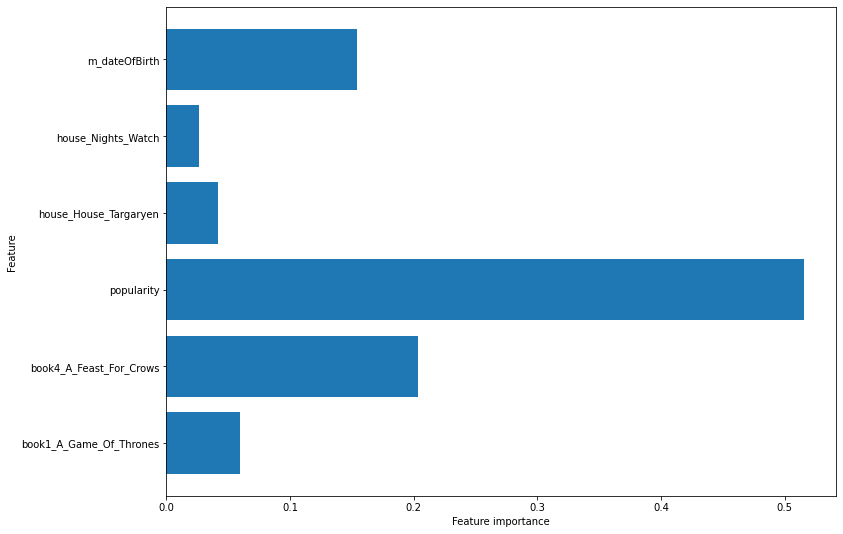

In [118]:
# plotting feature importances
plot_feature_importances(full_tree_tuned_fit,
                         train = x_train,
                         export = False)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Comparing results for selecting the best model</strong><br>
I identify the <strong>Full Tree</strong> as the most stable model.

In [119]:
# comparing results
print(f"""
 Model                    AUC Score        Training Accurracy        Testing Accuracy        TN, FP, FN, TP
 -----                    ---------        ------------------        ----------------        --------------
 Logistic                 {logreg_auc_score}                 {logreg_train_score}                 {logreg_test_score}               {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
 Full Tree                {full_tree_auc_score}                 {full_tree_auc_score}                 {full_tree_test_score}               {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
 Pruned Tree              {pruned_tree_auc_score}                 {pruned_tree_train_score}                 {pruned_tree_test_score}               {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
 lr_tuned                 {lr_tuned_auc}                 {lr_tuned_train_score}                 {lr_tuned_test_score}               {lr_tuned_tn, lr_tuned_fp, lr_tuned_fn, lr_tuned_tp}
 Tree Tuned               {tree_tuned_auc}                 {tree_tuned_train_score}                 {tree_tuned_test_score}               {tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp}
 Ranfom Forrest Default   {rf_default_auc_score}                   {rf_default_train_score}                 {rf_default_test_score}               {rf_tn, rf_fp, rf_fn, rf_tp }
*Full Tree Tuned          {full_tree_tuned_auc_score}                 {full_tree_tuned_train_score}                 {full_tree_tuned_test_score}               {tuned_ft_tn, tuned_ft_fp, tuned_ft_fn, tuned_ft_tp}

*Best Model
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree', 'lr tuned',
                       'Tree Tuned', 'Ranfom Forrest Default'  ],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score,
                   pruned_tree_auc_score, lr_tuned_auc,
                   tree_tuned_auc, rf_default_auc_score,
                   full_tree_tuned_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score, lr_tuned_train_score,
                          tree_tuned_train_score, rf_default_train_score,
                          full_tree_tuned_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score, lr_tuned_test_score,
                          tree_tuned_test_score, rf_default_test_score,
                          full_tree_tuned_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp),
                          (lr_tuned_tn, lr_tuned_fp, lr_tuned_fn, lr_tuned_tp),
                          (tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp),
                          (rf_tn, rf_fp, rf_fn, rf_tp  ),
                          (tuned_ft_tn, tuned_ft_fp, tuned_ft_fn, tuned_ft_tp)]}



 Model                    AUC Score        Training Accurracy        Testing Accuracy        TN, FP, FN, TP
 -----                    ---------        ------------------        ----------------        --------------
 Logistic                 0.6597                 0.7727                 0.8154               (17, 33, 3, 142)
 Full Tree                0.7176                 0.7176                 0.7846               (29, 21, 21, 124)
 Pruned Tree              0.7462                 0.8053                 0.8564               (26, 24, 4, 141)
 lr_tuned                 0.6862                 0.7744                 0.8256               (20, 30, 4, 141)
 Tree Tuned               0.7566                 0.7984                 0.8718               (26, 24, 1, 144)
 Ranfom Forrest Default   0.74                   0.8024                 0.8667               (24, 26, 0, 145)
*Full Tree Tuned          0.7493                 0.8224                 0.8513               (27, 23, 6, 139)

*Best Model

After doing an analysis, I have learn somethings about this data set. Popularity has been my most important variable among the others. This could be the reason that people die in GOT. People always tried to kill the leaders at some point of the series and every favorite character died at one point. Men have a bigger chance at dying as women since the majority of them are the ones that go to war. Having a bigger amount of FP is a good thing in most cases. In this case, I understand that people thought they were going to die, didn't. My gaps look a bit strange also.